In [1]:
pip install cbio_py

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [3]:
from cbio_py import cbio_mod as cb
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [4]:
studies = cb.getAllStudies()

In [5]:
studies

[{'allSampleCount': 104,
  'cancerType': None,
  'cancerTypeId': 'prad',
  'citation': 'Hieronymus et al. PNAS 2014',
  'cnaSampleCount': None,
  'completeSampleCount': None,
  'description': 'Genome-wide copy number profiling in 104 primary prostate cancer tumor/normal pairs. <a href="http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE54691">Raw data via GEO (GSE54691)</a>.',
  'groups': 'PUBLIC',
  'importDate': '2021-04-23 00:00:00',
  'massSpectrometrySampleCount': None,
  'methylationHm27SampleCount': None,
  'miRnaSampleCount': None,
  'mrnaMicroarraySampleCount': None,
  'mrnaRnaSeqSampleCount': None,
  'mrnaRnaSeqV2SampleCount': None,
  'name': 'Prostate Adenocarcinoma (MSKCC, PNAS 2014)',
  'pmid': '25024180',
  'publicStudy': True,
  'readPermission': True,
  'referenceGenome': 'hg19',
  'rppaSampleCount': None,
  'sequencedSampleCount': None,
  'status': 0,
  'studyId': 'prad_mskcc_2014'},
 {'allSampleCount': 10194,
  'cancerType': None,
  'cancerTypeId': 'mixed',
  'citat

In [33]:
#this is a funcction that searches for a specific keyword in the study name and returns the studies from a list of studies that have that name
def return_study_list_match(studies, keyword):
    study_list = []
    for study in studies:
        if keyword in study['studyId']:
            study_list.append(study)
    return study_list

#This function looks over a list of dictionaries and returns the values of of clinicalattributeId for a specific value
def clincial_attr_ID_value_finder(clinical_data_in_study, clinical_attribute_value):
    clinical_attributes = []
    for clinical_data in clinical_data_in_study:
        if clinical_data['clinicalAttributeId'] == clinical_attribute_value:
            clinical_attributes.append(clinical_data['value'])
    return clinical_attributes

#this function looks up all of the clinical data from a list of studies and then concatenates the data into a single list of clinical
#attribute dictionaries
def return_all_clinical_data_in_studies(studies):
    clinical_data_in_study = []
    for study in studies:
        clinical_data_in_study.extend(cb.getAllClinicalDataInStudy(study['studyId']))
    return clinical_data_in_study

#this function take clinical attributeID and returns the dictiories for that clinical attribute from a list of clinical attributes
def return_clinical_attribute_from_list(clinical_attributes, clinical_attribute_ID):
    clinical_attribute_list = []
    for clinical_attribute in clinical_attributes:
        if clinical_attribute['clinicalAttributeId'] == clinical_attribute_ID:
            clinical_attribute_list.append(clinical_attribute)
    return clinical_attribute_list

In [8]:
studies_pan_can = return_study_list_match(studies, 'pan_can')

In [38]:
all_clinical_atrributes = return_all_clinical_data_in_studies(studies_pan_can)

In [43]:

cancer_types = return_clinical_attribute_from_list(all_clinical_atrributes, 'CANCER_TYPE')
tmb_values = return_clinical_attribute_from_list(all_clinical_atrributes, 'TMB_NONSYNONYMOUS')
cancer_types
tmb_values

[{'clinicalAttribute': None,
  'clinicalAttributeId': 'TMB_NONSYNONYMOUS',
  'patientId': 'TCGA-3N-A9WB',
  'sampleId': 'TCGA-3N-A9WB-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'uniqueSampleKey': 'VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'value': '4.733333333'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'TMB_NONSYNONYMOUS',
  'patientId': 'TCGA-3N-A9WC',
  'sampleId': 'TCGA-3N-A9WC-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdDOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'uniqueSampleKey': 'VENHQS0zTi1BOVdDLTA2OnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'value': '51'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'TMB_NONSYNONYMOUS',
  'patientId': 'TCGA-3N-A9WD',
  'sampleId': 'TCGA-3N-A9WD-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdEOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXz

In [45]:
cancer_types_df = pd.DataFrame(cancer_types)
tmb_values_df = pd.DataFrame(tmb_values)

In [51]:
#this joins the cancer type and tmb values into a single dataframe on patient ID and Sampe ID fields
joined_df = pd.merge(cancer_types_df, tmb_values_df, how='inner',on=['patientId', 'sampleId'])

In [53]:
joined_df.head()

,clinicalAttribute_x,clinicalAttributeId_x,patientId,sampleId,studyId_x,uniquePatientKey_x,uniqueSampleKey_x,value_x,clinicalAttribute_y,clinicalAttributeId_y,studyId_y,uniquePatientKey_y,uniqueSampleKey_y,value_y
0,None,CANCER_TYPE,TCGA-3N-A9WB,TCGA-3N-A9WB-06,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,4.733333333
1,None,CANCER_TYPE,TCGA-3N-A9WC,TCGA-3N-A9WC-06,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdDOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdDLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdDOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdDLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,51
2,None,CANCER_TYPE,TCGA-3N-A9WD,TCGA-3N-A9WD-06,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdEOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdELTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdEOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdELTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,26.33333333
3,None,CANCER_TYPE,TCGA-BF-A1PU,TCGA-BF-A1PU-01,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBVOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBVLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBVOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBVLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,47.7
4,None,CANCER_TYPE,TCGA-BF-A1PV,TCGA-BF-A1PV-01,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBWOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBWLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBWOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBWLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,8.466666667


In [197]:
joined_df.to_csv('joined_df.csv')

In [59]:
joined_df.dtypes

clinicalAttribute_x      object
clinicalAttributeId_x    object
patientId                object
sampleId                 object
studyId_x                object
uniquePatientKey_x       object
uniqueSampleKey_x        object
value_x                  object
clinicalAttribute_y      object
clinicalAttributeId_y    object
studyId_y                object
uniquePatientKey_y       object
uniqueSampleKey_y        object
value_y                  object
dtype: object

In [62]:
#convert value_y to float
joined_df['value_y'] = joined_df['value_y'].astype(float)
#convert value_x to string
joined_df['value_x'] = joined_df['value_x'].astype(str)

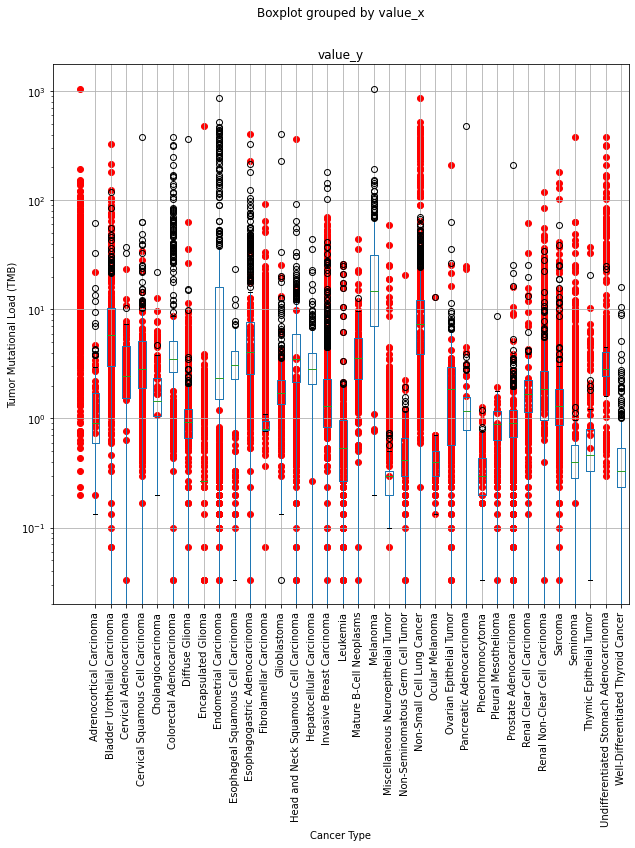

In [116]:
boxplot = joined_df.boxplot(column='value_y', by='value_x')
#change the scale of the y axis to be logarithmic
plt.yscale('log')
#change the x axis labels to be on an angle
plt.xticks(rotation=90)
#make the graph larger  
plt.rcParams["figure.figsize"] = (10,10)
#change the y axis name to be TMB
plt.ylabel('Tumor Mutational Load (TMB)')
#change the x axis name to be cancer type
plt.xlabel('Cancer Type')
#change the outlier circles to be red
plt.scatter(joined_df['value_x'], joined_df['value_y'], color='red')

In [119]:
joined_df['value_x']

0                         Melanoma
1                         Melanoma
2                         Melanoma
3                         Melanoma
4                         Melanoma
                   ...            
10438    Colorectal Adenocarcinoma
10439    Colorectal Adenocarcinoma
10440    Colorectal Adenocarcinoma
10441    Colorectal Adenocarcinoma
10442    Colorectal Adenocarcinoma
Name: value_x, Length: 10443, dtype: object

In [208]:
#unique value_x values
joined_df['value_x'].unique()

0                         Melanoma
1                         Melanoma
2                         Melanoma
3                         Melanoma
4                         Melanoma
                   ...            
10438    Colorectal Adenocarcinoma
10439    Colorectal Adenocarcinoma
10440    Colorectal Adenocarcinoma
10441    Colorectal Adenocarcinoma
10442    Colorectal Adenocarcinoma
Name: value_x, Length: 10443, dtype: object

ValueError: x and y must be the same size

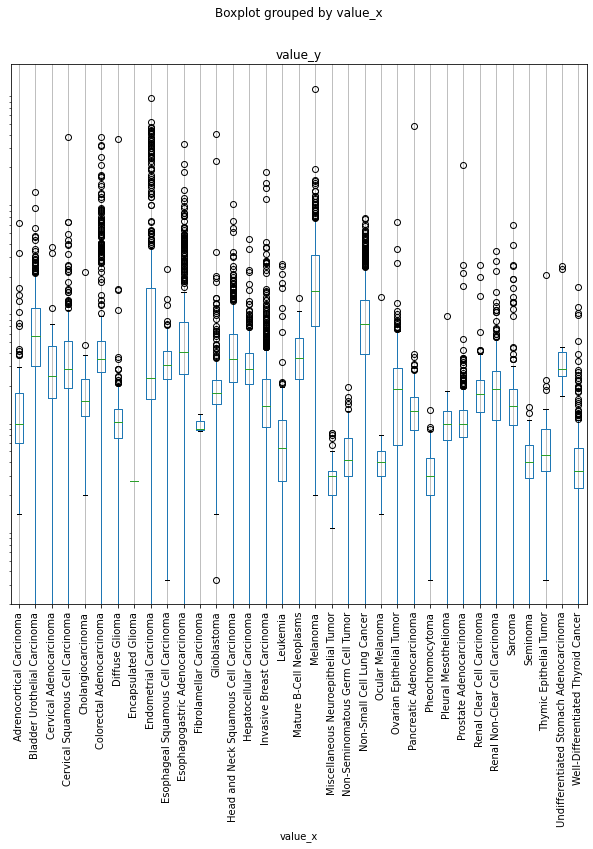

In [219]:
only_db.boxplot(column='value_y', by='value_x')
plt.yscale('log')
plt.xticks(rotation=90)
#plot each value_x on the plot as a scatter plot
for i in joined_df['value_x'].unique():
    y = joined_df.value_x[joined_df['value_x'] == i].dropna()
    x = i
    plt.scatter(x, y, color='red')

In [128]:
only_db = joined_df[['value_y','value_x']]


In [161]:
#clear the plot
plt.clf()
plt.show()

<Figure size 720x720 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x2960638b0>,
 'caps': [<matplotlib.lines.Line2D at 0x296063fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x296063520>],
 'medians': [<matplotlib.lines.Line2D at 0x296070730>],
 'fliers': [<matplotlib.lines.Line2D at 0x296070ac0>],
 'means': []}

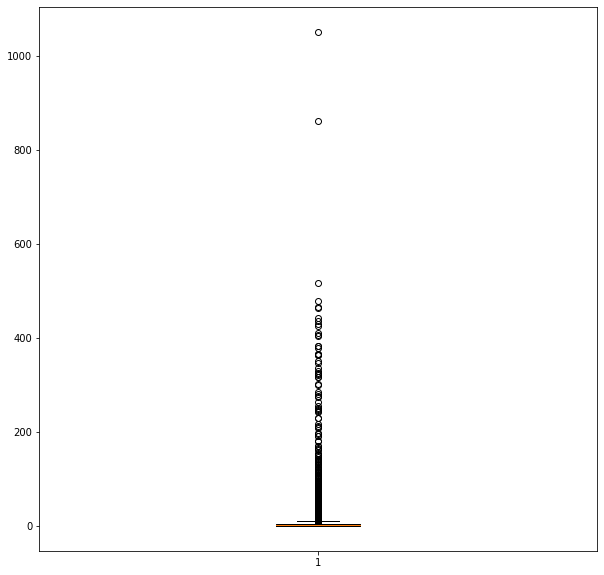

In [184]:
df_array = only_db['value_y'].to_numpy()
#change the df data type to float
df_array = df_array.astype(float)
plt.boxplot(df_array)

In [171]:
plt.clf()
vals, names, xs = [],[],[]
#SWITCH OUT JOINED DB TO ONLY_DB
for i, value_x in enumerate(only_db.columns):
    print(value_x)
    print(i)
    vals.append(only_db[value_x].values)
    names.append(value_x)
    xs.append(np.random.normal(i + 1, 0.04, only_db[value_x].values.shape[0]))

vals
#plt.boxplot(vals, labels=names, whis=1.5)

value_y
0
value_x
1


[array([ 4.73333333, 51.        , 26.33333333, ..., 84.33333333,
         2.63333333,  2.36666667]),
 array(['Melanoma', 'Melanoma', 'Melanoma', ...,
        'Colorectal Adenocarcinoma', 'Colorectal Adenocarcinoma',
        'Colorectal Adenocarcinoma'], dtype=object)]

<Figure size 720x720 with 0 Axes>

In [169]:
names

['value_y', 'value_x']

In [152]:
vals

[array([ 4.73333333, 51.        , 26.33333333, ..., 84.33333333,
         2.63333333,  2.36666667]),
 array(['Melanoma', 'Melanoma', 'Melanoma', ...,
        'Colorectal Adenocarcinoma', 'Colorectal Adenocarcinoma',
        'Colorectal Adenocarcinoma'], dtype=object)]

In [114]:
len(names)

10443